# Car Prices Assignment- Linear Regression

#### Problem Statement:

Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

Which variables are significant in predicting the price of a car?
How well those variables describe the price of a car?
Model the price of cars with the available independent variables.

- Determine All driving factors for the prices of cars in US market for chinese company
- Create a Linear Regression Model to predict prices


#### Importing Necessary Libraries


In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    pathMapping= r'CarPrice_Assignment.csv'
    carPricesDataset=pd.read_csv(pathMapping)
    pd.options.display.max_columns = None
except Exception as ex:
    print(ex)
carPrices=carPricesDataset

In [4]:
carPrices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carPrices.set_index('car_ID',inplace=True)

In [6]:
carPrices[['Car','Name']]=carPrices['CarName'].str.split(" ", n = 1, expand = True) 
#Dropping carName and Name as they are not needed and not relevant anymore

carPrices.drop(['CarName','Name'],axis=1,inplace=True)

In [7]:
carPrices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
carPrices.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
Car                  28
dtype: int64

In [9]:
carPrices.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
carPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

In [11]:
try:
    uniqueValuesOfEachColumn= {}
    for x in list(carPrices.columns):
        if(len(carPrices[x].unique())<=10):
            uniqueValuesOfEachColumn[x]=carPrices[x].unique()
except Exception as ex:
    print(ex)

lablesForCarMakers=carPrices['Car'].unique()

In [12]:
uniqueValuesOfEachColumn

{'symboling': array([ 3,  1,  2,  0, -1, -2]),
 'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['two', 'four'], dtype=object),
 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object),
 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
       dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
       dtype=object)}

In [13]:
lablesForCarMakers

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
#There are misspelled names in the dataset. so converting all to same correct names
def NormalizeMakerName(x):    
    x=x.lower()
    if(x in['maxda','mazda']):
        return'mazda'
    elif(x in['vokswagen','volkswagen','vw']):
        return'volkswagen'
    elif(x in['toyota','toyouta']):
        return'toyota'
    elif(x in['porsche','porcshce']):
        return'porsche'
    else:
        return x

carPrices['Car']=carPrices['Car'].apply(NormalizeMakerName)
lablesForCarMakers=carPrices['Car'].unique()

print(lablesForCarMakers)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


I will convert all the car makers to two categories: Luxury and Non-Luxury. Why? Because the names directly wont effect **Geely**. And **Geely** will always remain **Geely**. It wont ever become Audi or BMW. But its higly likly possible that **Geely** may launch its car in either luxury or non luxury category, and as such this data can help it price its car accordingly to gain market.

In [15]:

luxuryBrands=['alfa-romero', 'audi', 'bmw', 'jaguar', 'mercury', 'porsche', 'volvo']
#nonLuxuryBrands=['chevrolet', 'dodge', 'honda', 'isuzu', 'mazda', 'buick', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen']
carPrices['Car']=carPrices['Car'].apply(lambda x: 'luxury' if x in luxuryBrands else 'non-luxury')

In [16]:
carPrices['Car'].unique()

array(['luxury', 'non-luxury'], dtype=object)

We can see that there are 9 categorical variables viz.
**{CarName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem}**

Out of these **doornumber** and **cylindernumber** are just numbers in text format, we can convert them directly into their corresponding digit representatives.

The **car_ID** column had unique values, so i made it the index of the dataset, it has no effect on the prices anyways(as given in the data dictionary)

The **CarName** column has the company name and the car model concatenated together. We can separate them into two different columns containing the company name **Car** and the car model names **Name**. 
We might not need the car model names 'Name', because the prices of a model are determined by its brand, and specifications, not model name.

Moreover **Car** is has a lot of company names, and they are either a luxury brand or a non luxury brand. so i have converted them into two categories viz. luxury and non-luxury.

The **symboling** column has ordered categorical values, but as they are integers I can use them directly without changing them.

The **fueltype** , **aspiration** , **enginelocation** have 2 categories respectively. we can use 0 and 1 to represent the values.

All other categorical columns can be either dummy enoded or hot-encoded.

There are no null values as evident from the carPrice.info() functions' value, except in derived **Name** column where 2 values are missing for the **CarName** 'Subaru'. As I wont be using **Name** anyways, its not a problem.

# 2. Visualization of Data

Creating pariplots in scatter mode to see if there are any correlations and visualize patterns.

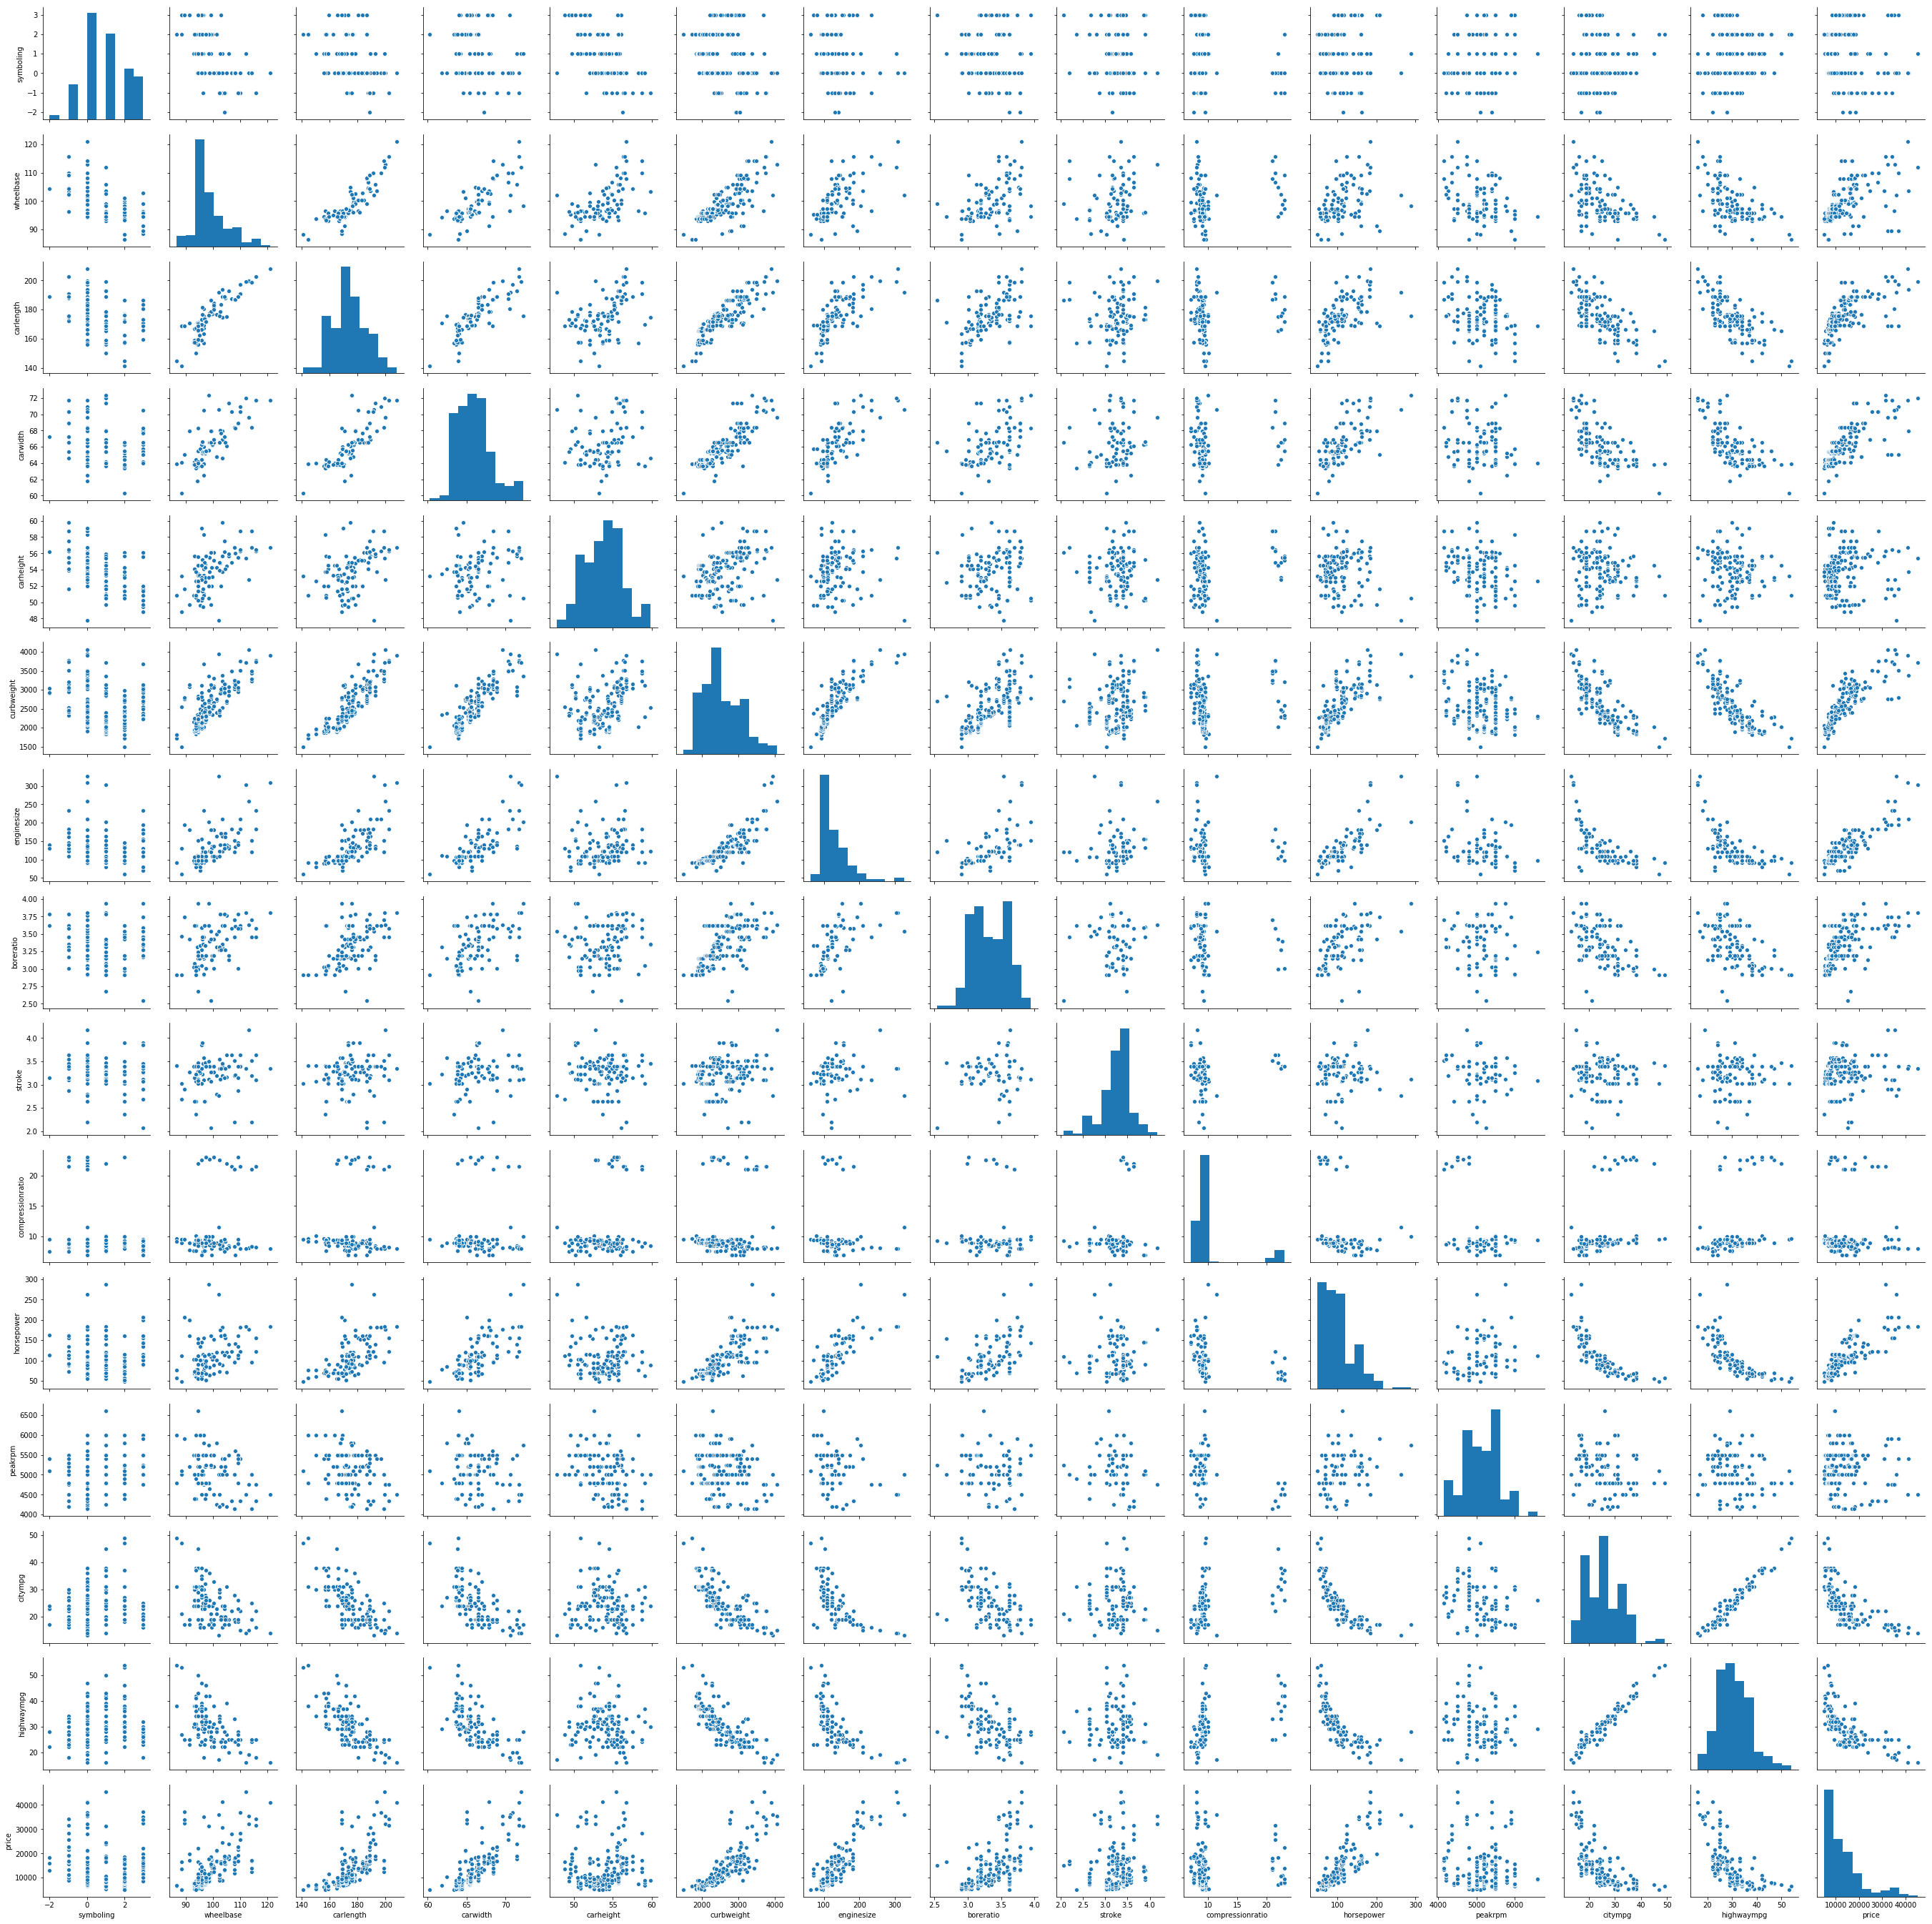

In [17]:
pairplt=sns.pairplot(carPrices)

The scatter plots show patterns for some combinations and are random for others.
price with all variables except carheight, peakrpm shows patterns.  carheight and  stroke are much dense in the middle bottom of the plots. Compression ratio absolutely divided into two different sections. peakratio seems to be random. citympg, highwaympg seem to have a negative slope.

Creating a Heat Map to visualize correlations properly to determine which variables are highly correlated to each other.

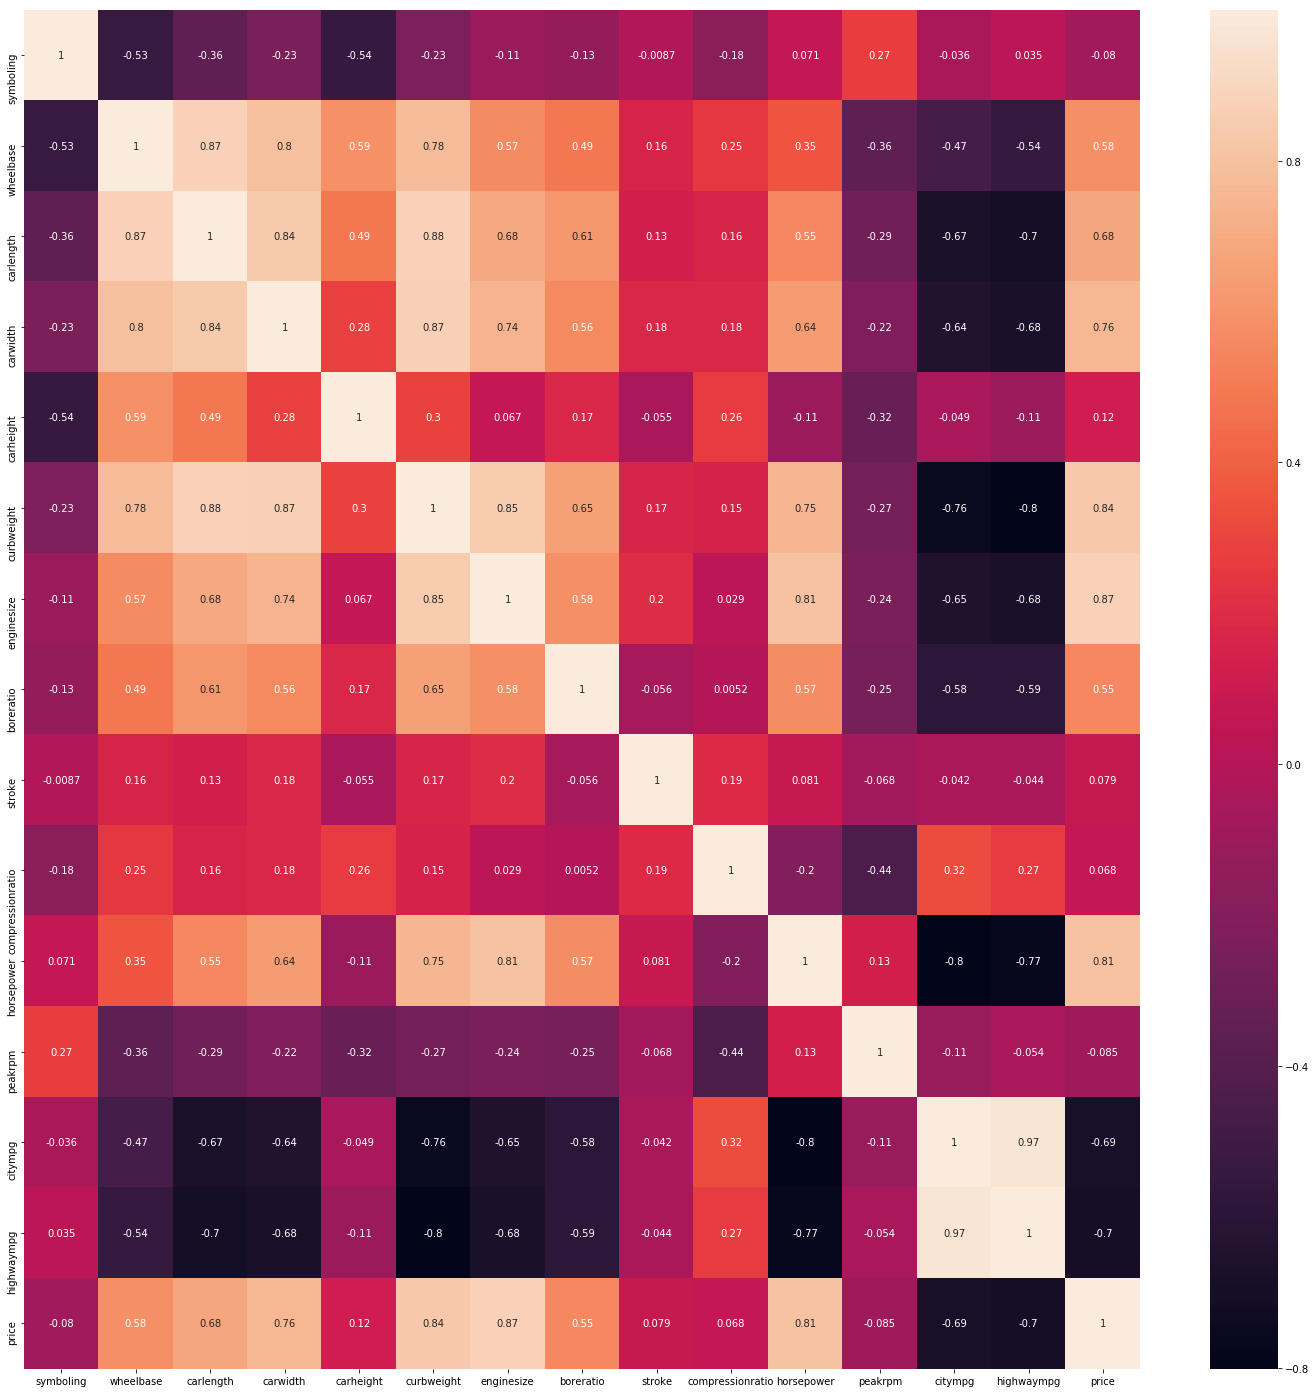

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(carPrices.corr(),annot=True)

There looks to be high correlation between price and curbweight, enignesize, horsepower, peakrpm. Enginesize has high correlation with horsepower and curbweight. carlenght and wheelbase have high corelation too.

Creating boxplots to visualize the categorical variables.

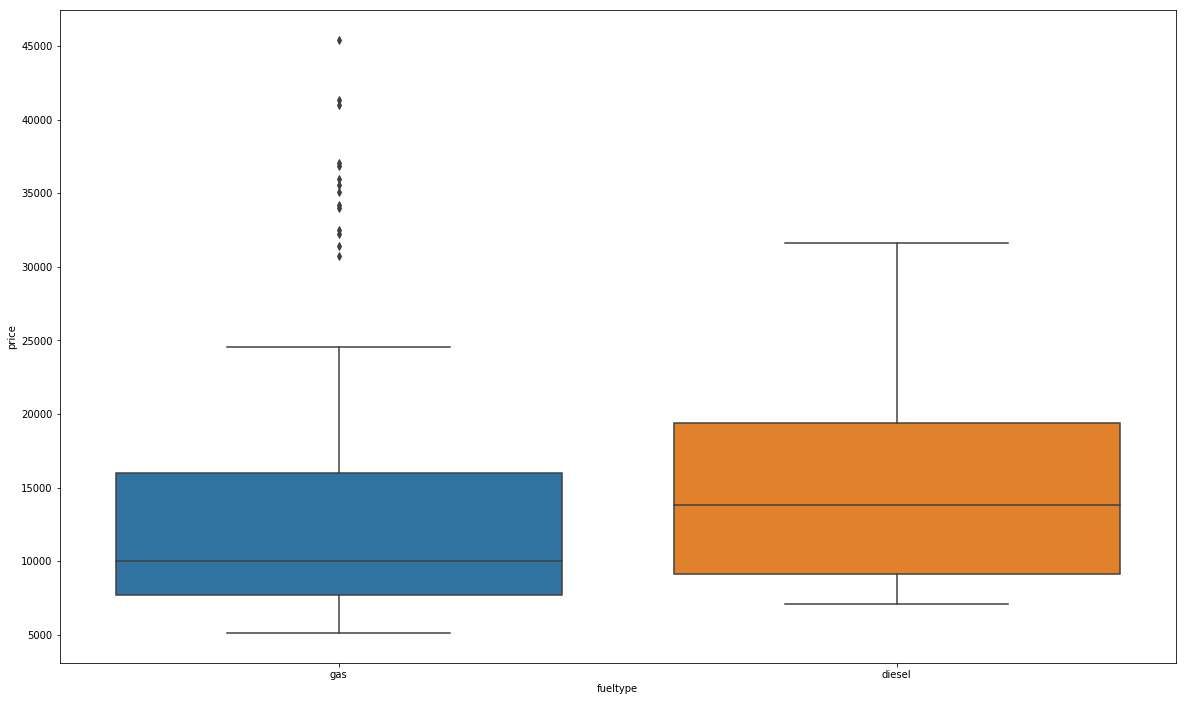

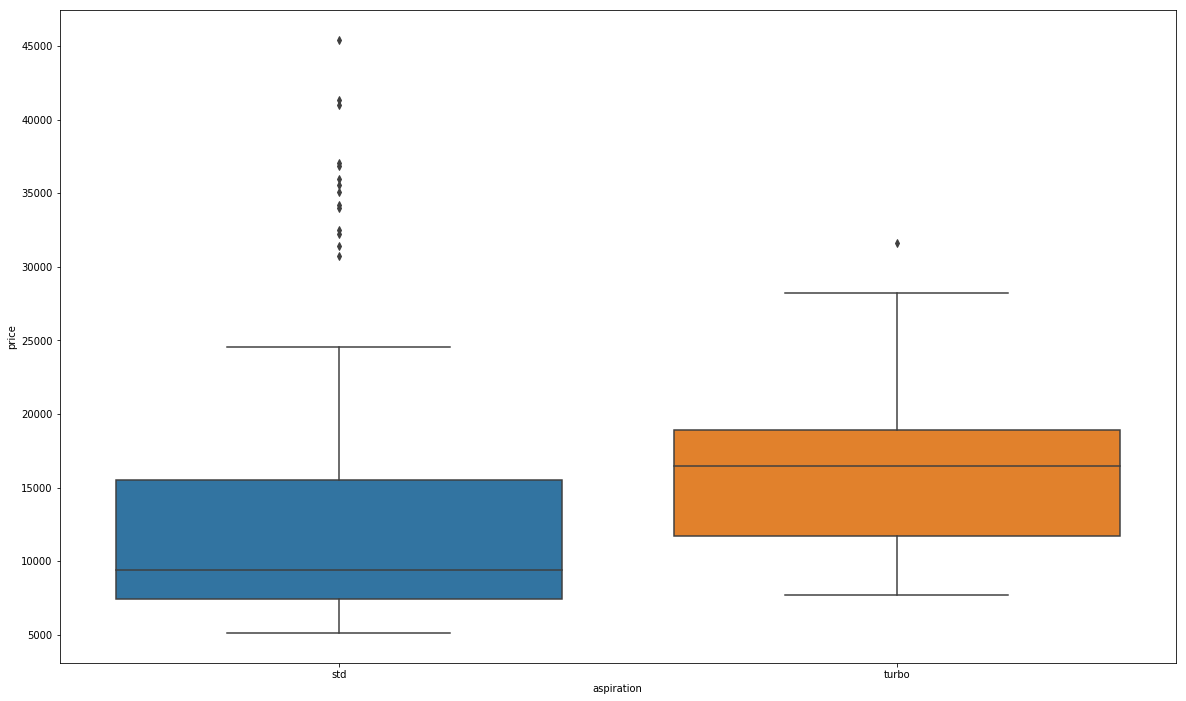

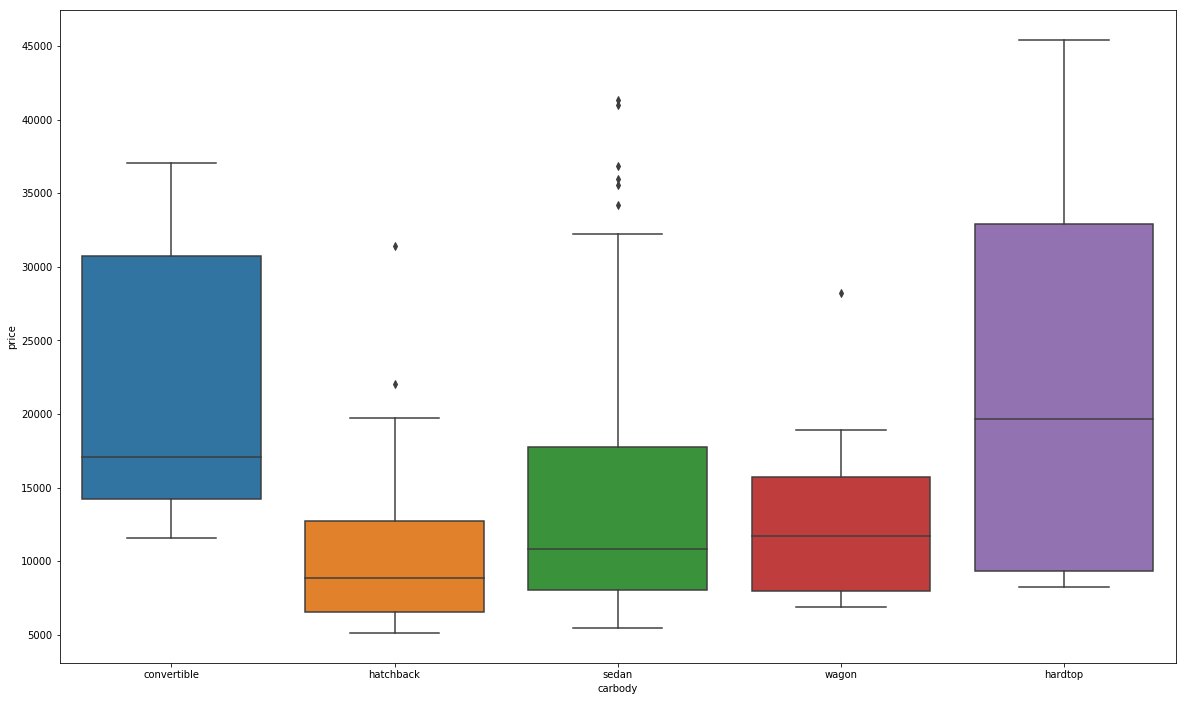

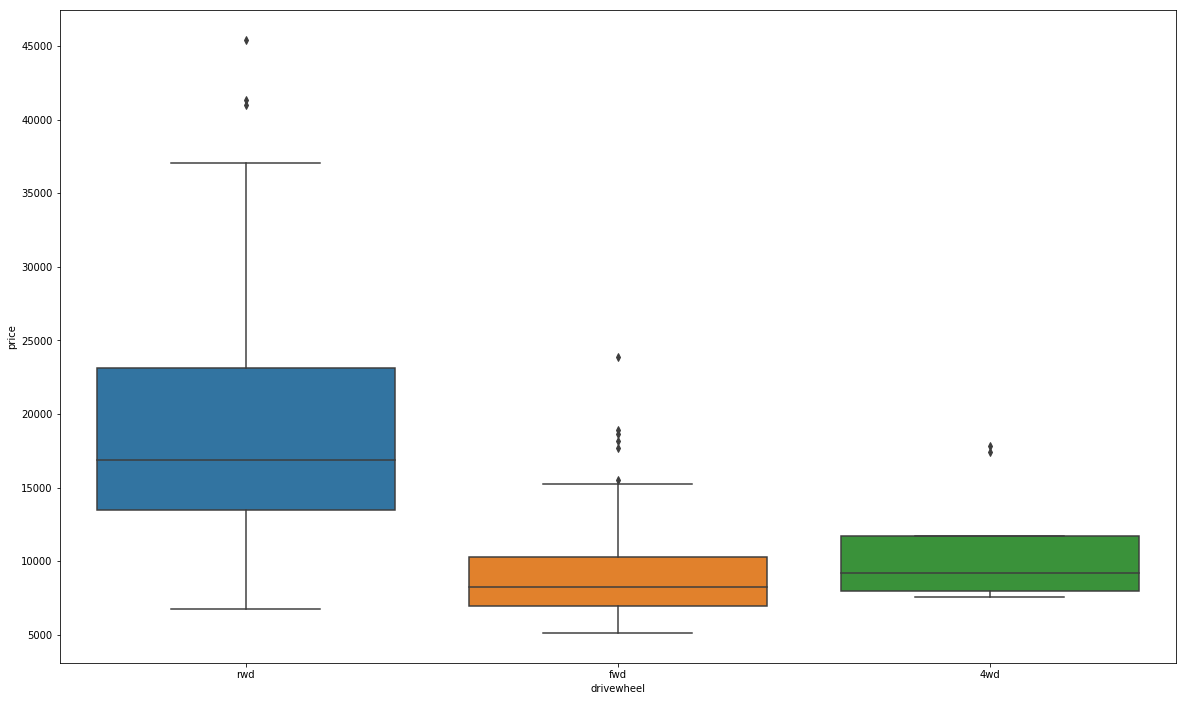

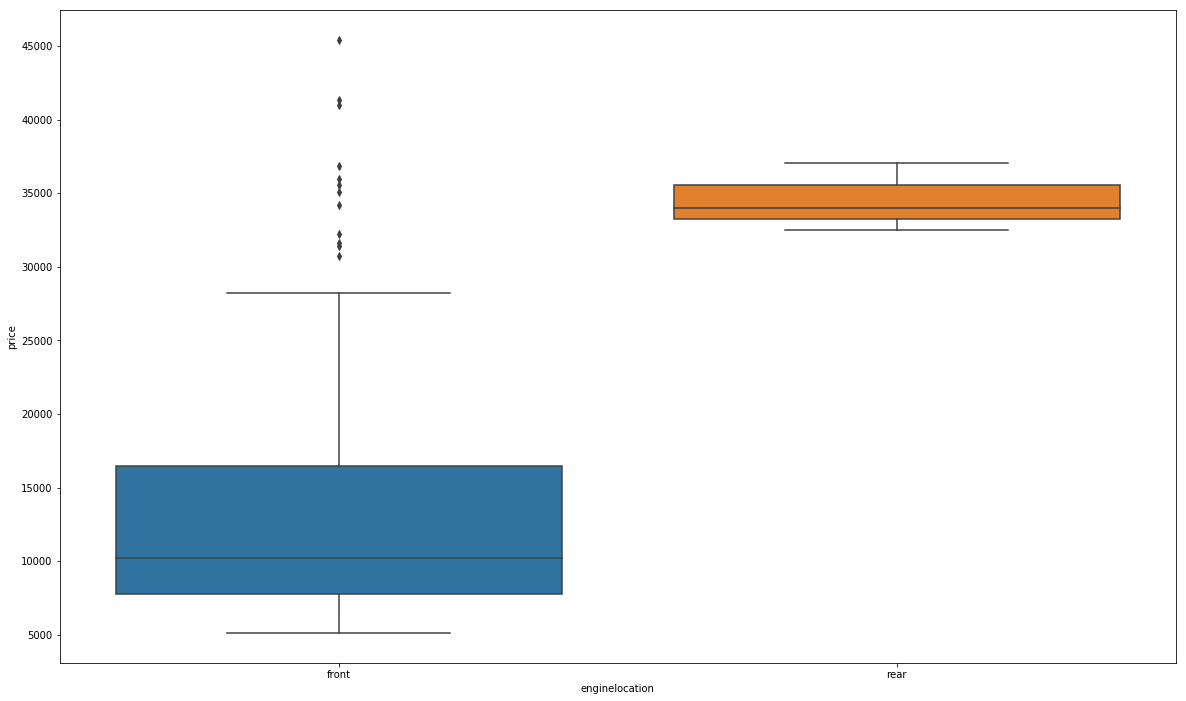

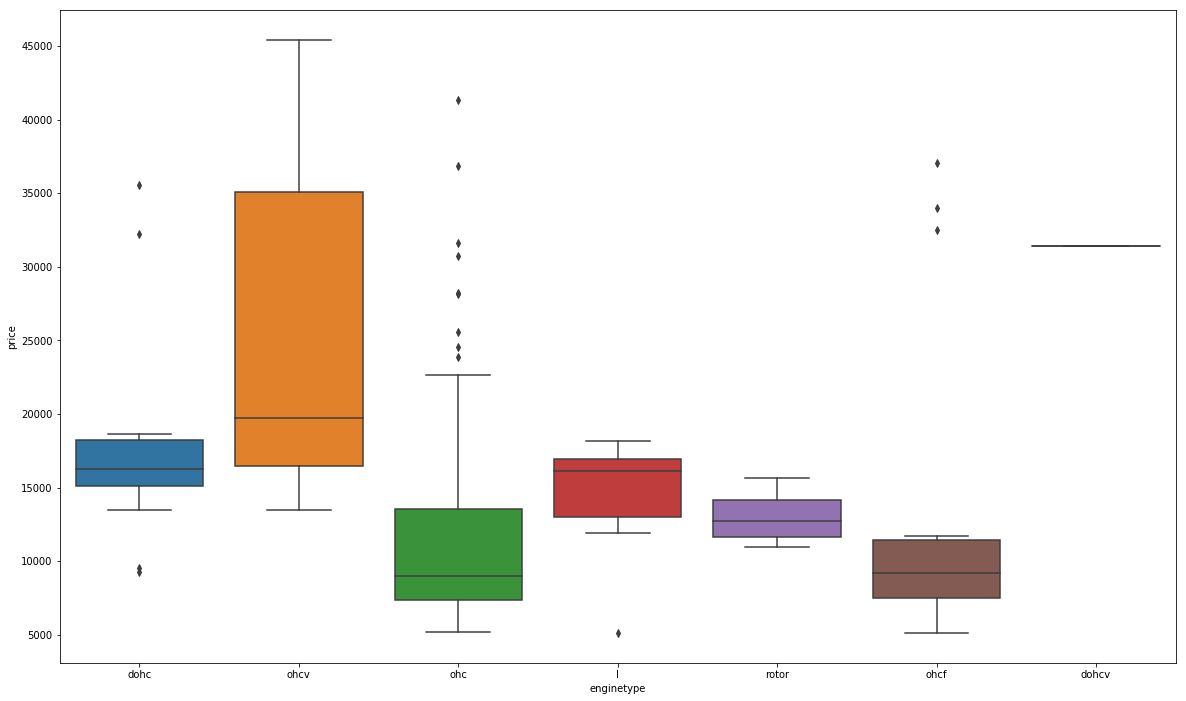

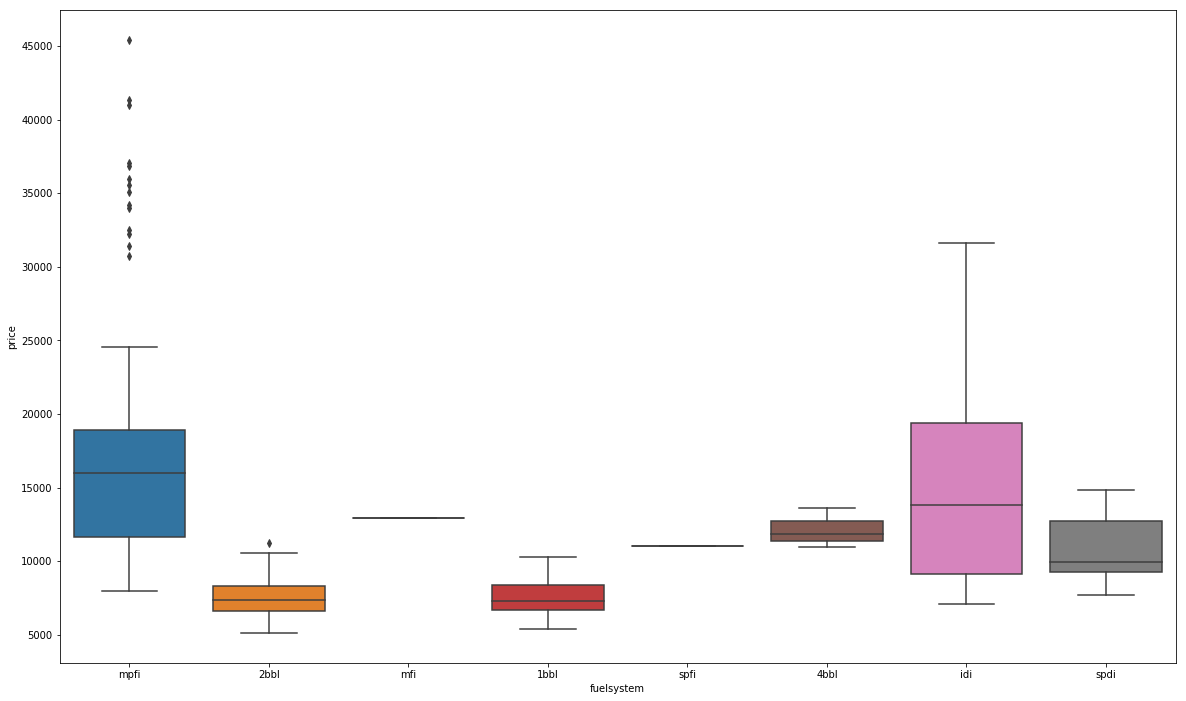

In [19]:
plt.figure(figsize=(20, 12))
#plt.subplot(321)
sns.boxplot(x = 'fueltype', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
#plt.subplot(322)
sns.boxplot(x = 'aspiration', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
#plt.subplot(323)
sns.boxplot(x = 'carbody', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
#plt.subplot(324)
sns.boxplot(x = 'drivewheel', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
#plt.subplot(325)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
#plt.subplot(326)
sns.boxplot(x = 'enginetype', y = 'price', data = carPrices)
plt.show()
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'fuelsystem', y = 'price', data = carPrices)
plt.show()


1. We can see that with fuelsystems, idi and mpfi have more price spread then others, they can be significant factors for price.
2. for enginetype ohcv has highest spead for price.
3. There are less cars with engine at the rear end, but they cost very high.
4. Rear wheel drive car are more in number and so are the prices for them.
5. convertibles  and hardtops cost more then other body type categories.
6. diesel cars have higher median value, but petrol cars have more outliers.
7. cars with std aspirations have more outliers but median for turbo is higher. and they are oppositely skewed. 

# 3. Preparing data for model creation

Converting all categorical variables into numerical data so that it can be used in creation of models.

In [20]:
wordToDigtsMapper={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,
                    'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,'fifteen':15,'sixteen':16,'seventeen':17,'eighteen':18,
                    'nineteen':19,'twenty':20}
wordToDigtsMapper

{'one': 1,
 'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'seven': 7,
 'eight': 8,
 'nine': 9,
 'ten': 10,
 'eleven': 11,
 'twelve': 12,
 'thirteen': 13,
 'fourteen': 14,
 'fifteen': 15,
 'sixteen': 16,
 'seventeen': 17,
 'eighteen': 18,
 'nineteen': 19,
 'twenty': 20}

In [21]:
def binary_map(x):
    return x.map(wordToDigtsMapper)

carPrices[['doornumber','cylindernumber']]=carPrices[['doornumber','cylindernumber']].apply(binary_map)
carPrices[['doornumber','cylindernumber']]

,doornumber,cylindernumber
car_ID,,
1,2,4
2,2,4
3,2,6
4,4,4
5,4,5
6,2,5
7,4,5
8,4,5
9,4,5


In [22]:
carPrices.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


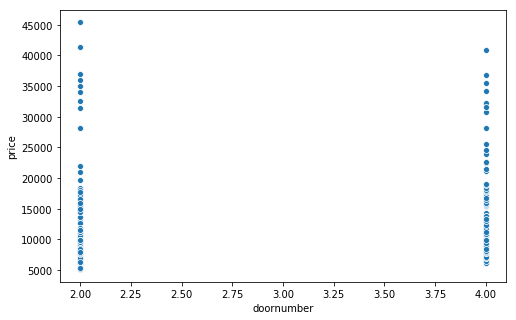

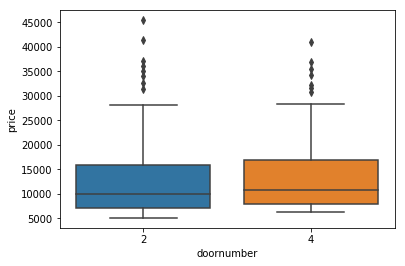

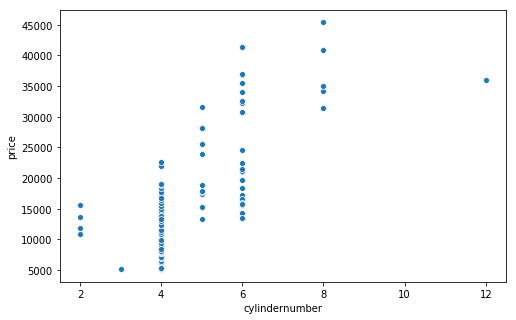

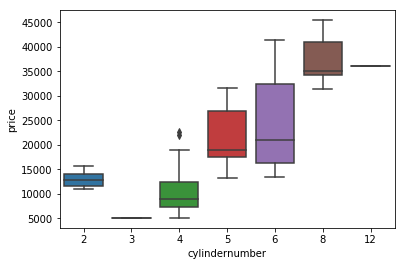

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="doornumber", y="price", data=carPrices)
plt.show()
sns.boxplot(x="doornumber", y="price", data=carPrices)
plt.show()
plt.figure(figsize=(8,5))
sns.scatterplot(x="cylindernumber", y="price", data=carPrices)
plt.show()
sns.boxplot(x="cylindernumber", y="price", data=carPrices)
plt.show()

We can see that cars with more number of cylinders have more price. at least the median values increases with increase in cylinder numbers. except for 2 and 3 cylinders. 
For the doornumbers the boxes overlap. and thus there might not be much influence of these on price. 

Converting other categorical variables into numerical values.

In [24]:
categoricalColumns=['fueltype','aspiration','enginelocation']
conversionFactors={}
for x in categoricalColumns:
    uniquesList=carPrices[x].unique()
    tempDictToStoreMapping={}
    for y in range(len(uniquesList)):
        tempDictToStoreMapping.update({uniquesList[y]:y})
    conversionFactors[x]=tempDictToStoreMapping

conversionFactors

{'fueltype': {'gas': 0, 'diesel': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'enginelocation': {'front': 0, 'rear': 1}}

In [25]:
columnstoDummify=['Car','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

In [26]:
#mapping all categorical values to their corresponding number assignments

for x in conversionFactors:
    carPrices[x]=carPrices[x].apply(lambda y: conversionFactors[x][y])

carPrices

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,luxury
2,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,luxury
3,1,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,luxury
4,2,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,luxury
5,2,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,luxury
6,2,0,0,2,sedan,fwd,0,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,luxury
7,1,0,0,4,sedan,fwd,0,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,luxury
8,1,0,0,4,wagon,fwd,0,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,luxury
9,1,0,1,4,sedan,fwd,0,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,luxury


In [27]:
carPrices.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.097561,0.180488,3.121951,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.994966,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,0.000000,0.000000,4.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,0.000000,0.000000,4.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,4.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
carPrices.shape

(205, 25)

In [29]:
#Dummifying the car makers column
# Let's drop the first column from status df using 'drop_first = True'
carMakers = pd.get_dummies(carPrices[columnstoDummify], drop_first = True)
# Add the results to the original housing dataframe
carPrices = pd.concat([carPrices, carMakers], axis = 1)
#Dropping the original columns, we alredy have all the unique values for each columns in uniqueValuesOfEachColumn variable

carPrices.drop(columnstoDummify,axis=1,inplace=True)

In [30]:
carPrices.shape

(205, 39)

In [31]:
carPrices.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.097561,0.180488,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.814634,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.297446,0.385535,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.389545,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,0.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


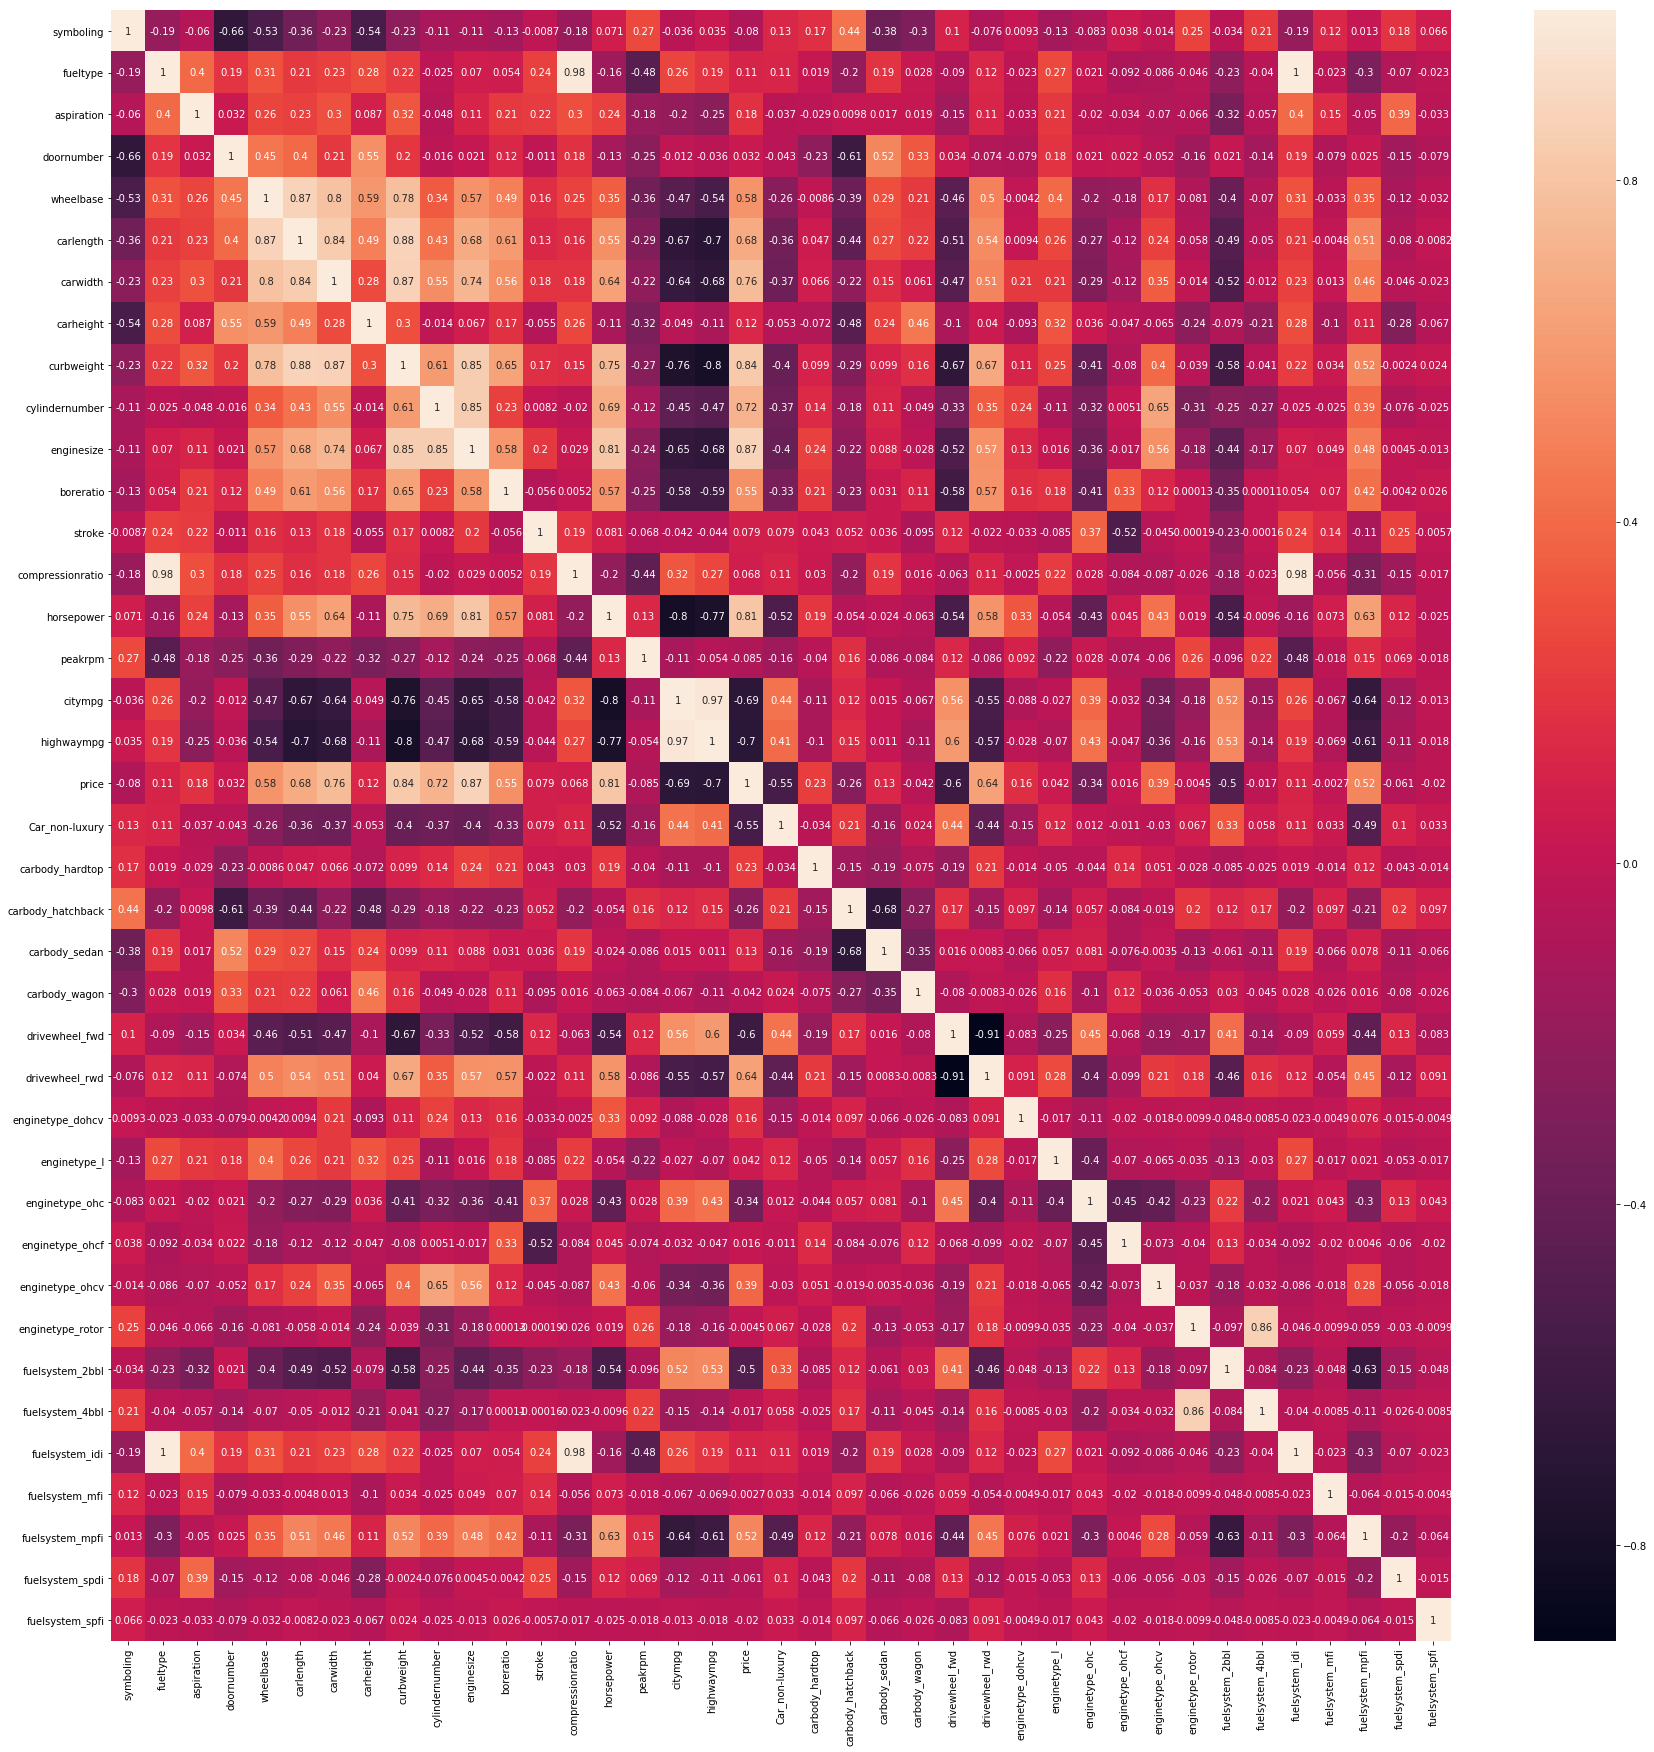

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(carPrices.corr(),annot=True)

# 4. Building Model

In [33]:
#Splitting for test and train
from sklearn.model_selection import train_test_split
nm.random.seed(0)
carPrices_Train,carPrices_Test = train_test_split(carPrices,train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
carPrices_Train.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,0.090909,0.181818,3.118881,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.818182,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,0.288490,0.387050,0.996399,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,0.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,2.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,4.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,4.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,0.000000,0.000000,4.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,4.000000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,3.000000,1.000000,1.000000,4.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [35]:
carPrices_Test.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.112903,0.177419,3.129032,99.295161,175.508065,66.064516,54.124194,2592.596774,4.322581,131.403226,3.381290,3.267742,10.350000,107.725806,5113.709677,24.822581,30.467742,13784.967742,0.806452,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,1.358620,0.319058,0.385142,0.999736,6.172983,11.681726,1.985282,2.438670,462.719100,0.882883,43.147273,0.287889,0.318261,4.379039,39.210307,470.626488,6.192338,6.728256,8436.653035,0.398304,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,-2.000000,0.000000,0.000000,2.000000,86.600000,144.600000,62.500000,49.400000,1819.000000,4.000000,79.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,14.000000,16.000000,5399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,95.700000,169.350000,64.600000,52.150000,2275.000000,4.000000,108.000000,3.190000,3.150000,8.500000,73.750000,4800.000000,19.000000,25.000000,8460.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,4.000000,97.850000,174.800000,65.600000,54.450000,2535.000000,4.000000,121.000000,3.390000,3.350000,9.000000,100.500000,5000.000000,24.000000,30.000000,10873.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,4.000000,103.150000,185.375000,66.500000,55.700000,2944.250000,4.000000,144.750000,3.620000,3.460000,9.400000,119.000000,5475.000000,29.000000,34.000000,16601.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,4.000000,120.900000,208.100000,72.000000,59.800000,3900.000000,8.000000,308.000000,3.800000,3.900000,23.000000,207.000000,6600.000000,38.000000,47.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Normalizing values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns 
listCols=list(carPrices.columns)
# for x in lablesForCarMakers:
#     if(x in listCols):
#         listCols.remove(x)

carPrices_Train[listCols] = scaler.fit_transform(carPrices_Train[listCols])
carPrices_Test[listCols] = scaler.fit_transform(carPrices_Test[listCols])

In [37]:
carPrices_Train.head(2)

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,0.6,0.0,0.0,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.55102,0.500000,0.567568,0.068818,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
126,1.0,0.0,0.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.55102,0.166667,0.270270,0.466890,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
carPrices_Test.head(2)

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,0.4,0.0,0.0,1.0,0.265306,0.341732,0.200000,0.346154,0.132148,0.0,0.082969,0.515873,0.524590,0.125,0.116129,0.265306,1.000000,1.000000,0.058474,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.8,0.0,0.0,1.0,0.311953,0.426772,0.315789,0.605769,0.219125,0.0,0.131004,0.515873,0.726776,0.125,0.212903,0.448980,0.541667,0.580645,0.077398,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
carPrices_Train.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.818182,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [40]:
carPrices_Test.describe()

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.370121,0.486741,0.375212,0.454249,0.371743,0.080645,0.228835,0.667691,0.654504,0.209375,0.359521,0.393351,0.450941,0.466701,0.209644,0.806452,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.179970,0.183964,0.208977,0.234487,0.222354,0.220721,0.188416,0.228484,0.173913,0.273690,0.252970,0.192092,0.258014,0.217041,0.210911,0.398304,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.000000,0.126638,0.515873,0.590164,0.093750,0.140323,0.265306,0.208333,0.290323,0.076536,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.000000,0.183406,0.674603,0.699454,0.125000,0.312903,0.346939,0.416667,0.451613,0.136847,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.000000,0.287118,0.857143,0.759563,0.150000,0.432258,0.540816,0.625000,0.580645,0.280049,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
carPrices_Train.shape

(143, 39)

In [42]:
carPrices_Test.shape

(62, 39)

In [43]:
#dividng into X and Y
y_train = carPrices_Train.pop('price') #contains the price column as dependent variable
X_train = carPrices_Train #contains the predictor variables
y_test = carPrices_Test.pop('price') #contains the price column as dependent variable
X_test = carPrices_Test #contains the predictor variables

## Building model using SciKit Learn

In [44]:
# Importing RFE and LinearRegression and other necessary modules.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe_20 = RFE(lm, 20)             # running RFE
rfe_20 = rfe_20.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe_20.support_,rfe_20.ranking_,lm.coef_))

[('symboling', False, 5, 0.07264518181229346),
 ('fueltype', True, 1, 0.17636678750182372),
 ('aspiration', False, 9, 0.04354870237741507),
 ('doornumber', False, 16, 0.012273011394211542),
 ('wheelbase', False, 4, 0.08560358471267601),
 ('carlength', False, 12, -0.017679579988776145),
 ('carwidth', True, 1, 0.18373100530551087),
 ('carheight', True, 1, 0.12000122155740017),
 ('curbweight', True, 1, 0.1558002859925217),
 ('cylindernumber', True, 1, -0.6170357389412535),
 ('enginesize', True, 1, 1.5618418057134906),
 ('boreratio', True, 1, -0.355290807119953),
 ('stroke', True, 1, -0.3216270848630239),
 ('compressionratio', True, 1, -0.3922912497315564),
 ('horsepower', True, 1, 0.26303469856644773),
 ('peakrpm', True, 1, 0.13917070720255673),
 ('citympg', False, 8, -0.034741308981043724),
 ('highwaympg', True, 1, 0.26767823511552147),
 ('Car_non-luxury', False, 6, -0.05243703713230714),
 ('carbody_hardtop', False, 3, -0.09214707497852741),
 ('carbody_hatchback', True, 1, -0.11852836897

In [47]:
rfe_25 = RFE(lm, 25)             # running RFE
rfe_25 = rfe_25.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe_25.support_,rfe_25.ranking_,lm.coef_))

[('symboling', True, 1, 0.07264518181229346),
 ('fueltype', True, 1, 0.17636678750182372),
 ('aspiration', False, 4, 0.04354870237741507),
 ('doornumber', False, 11, 0.012273011394211542),
 ('wheelbase', True, 1, 0.08560358471267601),
 ('carlength', False, 7, -0.017679579988776145),
 ('carwidth', True, 1, 0.18373100530551087),
 ('carheight', True, 1, 0.12000122155740017),
 ('curbweight', True, 1, 0.1558002859925217),
 ('cylindernumber', True, 1, -0.6170357389412535),
 ('enginesize', True, 1, 1.5618418057134906),
 ('boreratio', True, 1, -0.355290807119953),
 ('stroke', True, 1, -0.3216270848630239),
 ('compressionratio', True, 1, -0.3922912497315564),
 ('horsepower', True, 1, 0.26303469856644773),
 ('peakrpm', True, 1, 0.13917070720255673),
 ('citympg', False, 3, -0.034741308981043724),
 ('highwaympg', True, 1, 0.26767823511552147),
 ('Car_non-luxury', True, 1, -0.05243703713230714),
 ('carbody_hardtop', True, 1, -0.09214707497852741),
 ('carbody_hatchback', True, 1, -0.1185283689781615

In [49]:
rfe_15 = RFE(lm, 15)             # running RFE
rfe_15 = rfe_15.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe_15.support_,rfe_15.ranking_,lm.coef_))

[('symboling', False, 10, 0.07264518181229346),
 ('fueltype', True, 1, 0.17636678750182372),
 ('aspiration', False, 14, 0.04354870237741507),
 ('doornumber', False, 21, 0.012273011394211542),
 ('wheelbase', False, 9, 0.08560358471267601),
 ('carlength', False, 17, -0.017679579988776145),
 ('carwidth', True, 1, 0.18373100530551087),
 ('carheight', True, 1, 0.12000122155740017),
 ('curbweight', False, 4, 0.1558002859925217),
 ('cylindernumber', True, 1, -0.6170357389412535),
 ('enginesize', True, 1, 1.5618418057134906),
 ('boreratio', True, 1, -0.355290807119953),
 ('stroke', True, 1, -0.3216270848630239),
 ('compressionratio', True, 1, -0.3922912497315564),
 ('horsepower', True, 1, 0.26303469856644773),
 ('peakrpm', True, 1, 0.13917070720255673),
 ('citympg', False, 13, -0.034741308981043724),
 ('highwaympg', False, 2, 0.26767823511552147),
 ('Car_non-luxury', False, 11, -0.05243703713230714),
 ('carbody_hardtop', False, 8, -0.09214707497852741),
 ('carbody_hatchback', False, 6, -0.1185

In [51]:
X_test.head(2)

,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Car_non-luxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,0.4,0.0,0.0,1.0,0.265306,0.341732,0.200000,0.346154,0.132148,0.0,0.082969,0.515873,0.524590,0.125,0.116129,0.265306,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.8,0.0,0.0,1.0,0.311953,0.426772,0.315789,0.605769,0.219125,0.0,0.131004,0.515873,0.726776,0.125,0.212903,0.448980,0.541667,0.580645,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
y_test_pred = lm.predict(X_test)
y_train_pred=lm.predict(X_train)

# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))

RMSE TEST: 0.10966678468487695
RMSE TRAIN: 0.05707965381771118
R2-Score TEST: 0.7252021089420575
R2-Score TRAIN: 0.9294685118164996


The next part is a bit complex, I m going to store the supported and not supported columns obtained from the RFE for 25, 20, 15 variables in lists and then i will use that list to create 3 LM models using OLS to see which is better. I will continue with the best model in hand.

In [53]:
#taking the columns which have support as true
supportedCols_25_20_15 = [X_train.columns[rfe_25.support_],X_train.columns[rfe_20.support_],X_train.columns[rfe_15.support_]]
supportedCols_25_20_15

[Index(['symboling', 'fueltype', 'wheelbase', 'carwidth', 'carheight',
        'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
        'Car_non-luxury', 'carbody_hardtop', 'carbody_hatchback',
        'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginetype_dohcv',
        'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
        'fuelsystem_idi'],
       dtype='object'),
 Index(['fueltype', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'highwaympg', 'carbody_hatchback', 'carbody_wagon',
        'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
        'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_idi'],
       dtype='object'),
 Index(['fueltype', 'carwidth', 'carheight', 'cylindernumber', 'enginesize',
        'boreratio', 'stroke', 'compressionratio', 'horsepower', 

In [54]:
notSupportedCols_25_20_15=[X_train.columns[~rfe_25.support_],X_train.columns[~rfe_20.support_],X_train.columns[~rfe_15.support_]]
notSupportedCols_25_20_15

[Index(['aspiration', 'doornumber', 'carlength', 'citympg', 'drivewheel_fwd',
        'enginetype_l', 'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
        'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
        'fuelsystem_spfi'],
       dtype='object'),
 Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
        'citympg', 'Car_non-luxury', 'carbody_hardtop', 'carbody_sedan',
        'drivewheel_fwd', 'enginetype_l', 'enginetype_ohcv', 'fuelsystem_2bbl',
        'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
        'fuelsystem_spdi', 'fuelsystem_spfi'],
       dtype='object'),
 Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
        'curbweight', 'citympg', 'highwaympg', 'Car_non-luxury',
        'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
        'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
        'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
        'fuelsy

#### Creating LM model using statsmodel for all the metrics and stats:

In [55]:
#test set with RFE selected variables
X_train_rfe_25 = X_train[supportedCols_25_20_15[0]] #index 0 in this list has columns for rfe_25
import statsmodels.api as sm  
#adding constant 
X_train_rfe_25 = sm.add_constant(X_train_rfe_25)
lm_25 = sm.OLS(y_train,X_train_rfe_25).fit()
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     60.86
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.27e-55
Time:                        22:37:14   Log-Likelihood:                 202.39
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     118   BIC:                            -280.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0730      0.12

The model indicates that there are multicollinearity problems. So they need to be dealt with. Moreover **curbweight**, **carbody_wagon** have high p values, and are insignificant. we will remove them one after the other. Dealing with Multicollinearity first:

In [56]:
#test set with RFE selected variables
X_train_rfe_20 = X_train[supportedCols_25_20_15[1]] #index 1 inthis list has columns for rfe_20
 
#adding constant
X_train_rfe_20 = sm.add_constant(X_train_rfe_20)
lm_20 = sm.OLS(y_train,X_train_rfe_20).fit()
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     67.87
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.47e-56
Time:                        22:37:14   Log-Likelihood:                 191.48
No. Observations:                 143   AIC:                            -343.0
Df Residuals:                     123   BIC:                            -283.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0384      0.11

The model indicates that there are multicollinearity problems. So they need to be dealt with. Moreover **curbweight**, **carbody_wagon** have high p values, and are insignificant. we will remove them one after the other. Dealing with Multicollinearity first:

In [57]:
#test set with RFE selected variables
X_train_rfe_15 = X_train[supportedCols_25_20_15[2]] #index 2 in this list has columns for rfe_15
X_test_rfe_15=X_test[supportedCols_25_20_15[2]] #index 2 in this list has columns for rfe_15
import statsmodels.api as sm  
#adding constant
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
lm_15 = sm.OLS(y_train,X_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     79.15
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.43e-56
Time:                        22:37:14   Log-Likelihood:                 179.09
No. Observations:                 143   AIC:                            -328.2
Df Residuals:                     128   BIC:                            -283.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2064      0.085  

All the models indicates that there are multicollinearity problems. So they need to be dealt with. Moreover **curbweight**, **carbody_wagon** have high p values, and are insignificant. we will remove them one after the other.
However for model with 15 variables the f-stat is high and prob(f-stat) is nearest to 0.

So we will consider only this model as our base model.
Now
Dealing with Multicollinearity first:

In [58]:
X_train_rfe = X_train_rfe_15
X_test_rfe=X_test_rfe_15

In [59]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
14,fuelsystem_idi,inf
7,compressionratio,90.45
4,enginesize,74.23
3,cylindernumber,62.16
5,boreratio,29.59
1,carwidth,28.93
8,horsepower,27.61
6,stroke,20.44
9,peakrpm,11.85


The above values show that VIF is very high for most of the variables. We need to drop most of them. We will look into the significance of the variables too. but from here we will look only into rfe_15

**compressionratio** has a p value of 0.402. Removing it:

In [60]:
X_train_rfe_1st=X_train_rfe.drop('compressionratio',axis=1)
X_test_rfe_1st=X_test_rfe.drop('compressionratio',axis=1)
lm_1st=sm.OLS(y_train,X_train_rfe_1st).fit()
print(lm_1st.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     85.38
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.64e-57
Time:                        22:37:14   Log-Likelihood:                 178.69
No. Observations:                 143   AIC:                            -329.4
Df Residuals:                     129   BIC:                            -287.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1953      0.084  

Now all columns have significance, and their p values are good too, <0.05 so lets look into VIF for these columns.

In [61]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_1st.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
13,fuelsystem_idi,inf
4,enginesize,71.58
3,cylindernumber,37.47
1,carwidth,27.68
5,boreratio,23.78
7,horsepower,22.34
6,stroke,20.41
8,peakrpm,10.70
2,carheight,10.19


Removing **fueltype** as it has high VIF:


In [62]:
X_train_rfe_2nd=X_train_rfe_1st.drop('fueltype',axis=1)
X_test_rfe_2nd=X_test_rfe_1st.drop('fueltype',axis=1)
lm_2nd=sm.OLS(y_train,X_train_rfe_2nd).fit()
print(lm_2nd.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     85.38
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.64e-57
Time:                        22:37:14   Log-Likelihood:                 178.69
No. Observations:                 143   AIC:                            -329.4
Df Residuals:                     129   BIC:                            -287.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1953      0.084  

we can see that the multicollinearity warning is no longer displayed.

In [63]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_2nd.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,71.58
2,cylindernumber,37.47
0,carwidth,27.68
4,boreratio,23.78
6,horsepower,22.34
5,stroke,20.41
7,peakrpm,10.70
1,carheight,10.19
9,enginetype_ohc,7.54
10,enginetype_ohcf,2.64


Removing **enginesize** as it has high VIF:

In [64]:
X_train_rfe_enginesizeDropped=X_train_rfe_2nd.drop('enginesize',axis=1)
X_test_rfe_enginesizeDropped=X_test_rfe_2nd.drop('enginesize',axis=1)
lm_enginesizeDropped=sm.OLS(y_train,X_train_rfe_enginesizeDropped).fit()
print(lm_enginesizeDropped.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     54.37
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.06e-44
Time:                        22:37:14   Log-Likelihood:                 145.28
No. Observations:                 143   AIC:                            -264.6
Df Residuals:                     130   BIC:                            -226.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3225      0.075  

In [65]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_enginesizeDropped.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.88
4,stroke,17.92
3,boreratio,17.05
5,horsepower,16.55
2,cylindernumber,14.63
1,carheight,9.09
6,peakrpm,6.85
8,enginetype_ohc,6.69
9,enginetype_ohcf,2.15
11,fuelsystem_idi,1.89


Dropping enginesize decreases all statistics, and increases most p values. so lets not drop it and drop the next largest VIF valued cloumn: i.e. **cylindernumber**

In [66]:
X_train_rfe_cylindernumberDropped=X_train_rfe_2nd.drop('cylindernumber',axis=1) #deleting 3rd column
X_test_rfe_cylindernumberDropped=X_test_rfe_2nd.drop('cylindernumber',axis=1)
lm_cylindernumberDropped=sm.OLS(y_train,X_train_rfe_cylindernumberDropped).fit()
print(lm_cylindernumberDropped.summary())
X_train_rfe_3rd=X_train_rfe_cylindernumberDropped
X_test_rfe_3rd=X_test_rfe_cylindernumberDropped

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     72.68
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.35e-51
Time:                        22:37:14   Log-Likelihood:                 162.98
No. Observations:                 143   AIC:                            -300.0
Df Residuals:                     130   BIC:                            -261.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2021      0.050  

The stats obtained for this LM model is better then the one obtained upon removing **enginesize** so lets go with this. Again we have some variables with p values > -.05. lets drop them and see what happens: Dropping **enginetype_ohcf**

In [67]:
#kept the name as 4th as we are removing the 4th column now
X_train_rfe_4th=X_train_rfe_3rd.drop('enginetype_ohcf',axis=1) 
X_test_rfe_4th=X_test_rfe_3rd.drop('enginetype_ohcf',axis=1)
lm_4th=sm.OLS(y_train,X_train_rfe_4th).fit()
print(lm_4th.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     79.56
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.87e-52
Time:                        22:37:15   Log-Likelihood:                 162.72
No. Observations:                 143   AIC:                            -301.4
Df Residuals:                     131   BIC:                            -265.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1878      0.045  

We can see that the stat values have increased: lets drop the next insignificant variable: **boreratio**

In [68]:
#kept the name as 5th as we are removing the 4th column now
X_train_rfe_5th=X_train_rfe_4th.drop('boreratio',axis=1) 
X_test_rfe_5th=X_test_rfe_4th.drop('boreratio',axis=1) 
lm_5th=sm.OLS(y_train,X_train_rfe_5th).fit()
print(lm_5th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     87.86
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.39e-53
Time:                        22:37:15   Log-Likelihood:                 162.49
No. Observations:                 143   AIC:                            -303.0
Df Residuals:                     132   BIC:                            -270.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2034      0.038  

In [69]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_5th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,27.21
0,carwidth,25.76
4,horsepower,22.00
3,stroke,18.99
5,peakrpm,8.02
1,carheight,7.82
7,enginetype_ohc,6.21
9,fuelsystem_idi,1.89
8,enginetype_rotor,1.70
6,enginetype_dohcv,1.45


**enginetype_dohcv** has p value 0.361 we will remove that.
Also we can notice from VIF,
**carwidth** can be deleted here as, by domain knowledge, larger engine size has higher power.

In [70]:
#6th model
X_train_rfe_6th=X_train_rfe_5th.drop('enginetype_dohcv',axis=1) 
X_test_rfe_6th=X_test_rfe_5th.drop('enginetype_dohcv',axis=1) 

lm_6th=sm.OLS(y_train,X_train_rfe_6th).fit()
print(lm_6th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     97.65
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.54e-54
Time:                        22:37:15   Log-Likelihood:                 162.04
No. Observations:                 143   AIC:                            -304.1
Df Residuals:                     133   BIC:                            -274.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2043      0.038  

In [71]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_6th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.25
2,enginesize,23.09
3,stroke,18.96
4,horsepower,17.48
5,peakrpm,7.92
1,carheight,7.74
6,enginetype_ohc,6.19
8,fuelsystem_idi,1.86
7,enginetype_rotor,1.64


**peakrpm** has p-value 0.06, it needs to be deleted.

In [72]:
#7th model
X_train_rfe_7th=X_train_rfe_6th.drop('peakrpm',axis=1) 
X_test_rfe_7th=X_test_rfe_6th.drop('peakrpm',axis=1)
lm_7th=sm.OLS(y_train,X_train_rfe_7th).fit()
print(lm_7th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.86e-54
Time:                        22:37:15   Log-Likelihood:                 160.17
No. Observations:                 143   AIC:                            -302.3
Df Residuals:                     134   BIC:                            -275.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1684      0.033  

In [73]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_7th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,24.91
2,enginesize,18.87
3,stroke,16.17
4,horsepower,14.29
1,carheight,7.56
5,enginetype_ohc,6.03
6,enginetype_rotor,1.60
7,fuelsystem_idi,1.55


Now, again all variables have good p-values. So we look into VIF, and delete **carwidth**

In [74]:
#8th model
X_train_rfe_8th=X_train_rfe_7th.drop('carwidth',axis=1) 
X_test_rfe_8th=X_test_rfe_7th.drop('carwidth',axis=1) 

lm_8th=sm.OLS(y_train,X_train_rfe_8th).fit()
print(lm_8th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     115.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.81e-54
Time:                        22:37:15   Log-Likelihood:                 156.03
No. Observations:                 143   AIC:                            -296.1
Df Residuals:                     135   BIC:                            -272.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1537      0.034  

In [75]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_8th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,16.68
2,stroke,15.90
3,horsepower,12.43
4,enginetype_ohc,5.99
0,carheight,5.14
5,enginetype_rotor,1.48
6,fuelsystem_idi,1.45


Lets see at this point how much good the model is.

In [76]:
X_train_rfe_final=X_train_rfe_8th
X_test_rfe_final=sm.add_constant(X_test_rfe_8th)

lm_final = LinearRegression()
lm_final.fit(X_train_rfe_final, y_train)

y_train_pred=lm_final.predict(X_train_rfe_final)
y_test_pred = lm_final.predict(X_test_rfe_final)

# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("RMSE difference(Train-Test): "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))-nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))
print("R2- Score Difference(Train-Test): "+str(r2_score(y_train, y_train_pred)-r2_score(y_test, y_test_pred)))

RMSE TEST: 0.11266512490171686
RMSE TRAIN: 0.08126517045745252
RMSE difference(Train-Test): -0.03139995444426434
R2-Score TEST: 0.7099704964485785
R2-Score TRAIN: 0.8570351451528126
R2- Score Difference(Train-Test): 0.1470646487042342


The R Squared score decreases by almost 0.15 from Test to Train set. the RMSE increases too

I would like to add the varibal of mcar makes to the model, as i feel that luxury and non luxury car types do influence price.

In [77]:
#9th model
X_train_rfe_9th=X_train_rfe_8th
X_test_rfe_9th=X_test_rfe_8th
X_train_rfe_9th["non_luxury"]=X_train["Car_non-luxury"]
X_test_rfe_9th["non_luxury"]=X_test["Car_non-luxury"]
lm_9th=sm.OLS(y_train,X_train_rfe_9th).fit()
print(lm_9th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     120.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.58e-57
Time:                        22:37:15   Log-Likelihood:                 167.23
No. Observations:                 143   AIC:                            -316.5
Df Residuals:                     134   BIC:                            -289.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0311      0.041  

As we can see the stats increased upon addition of luxury category. lets check its VIF

In [78]:
X_train_rfe_final=X_train_rfe_9th
X_test_rfe_final=sm.add_constant(X_test_rfe_9th)

lm_final = LinearRegression()
lm_final.fit(X_train_rfe_final, y_train)

y_train_pred=lm_final.predict(X_train_rfe_final)
y_test_pred = lm_final.predict(X_test_rfe_final)

# RMSE
# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("RMSE difference(Train-Test): "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))-nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))
print("R2- Score Difference(Train-Test): "+str(r2_score(y_train, y_train_pred)-r2_score(y_test, y_test_pred)))

RMSE TEST: 0.09854854519806293
RMSE TRAIN: 0.07514051575671561
RMSE difference(Train-Test): -0.023408029441347317
R2-Score TEST: 0.778096777487508
R2-Score TRAIN: 0.8777725560605664
R2- Score Difference(Train-Test): 0.09967577857305832


- The RMSE values increases from train to test by almost.02
- The R squared value decreases by 0.1 from train to test.

#### Lets see if we can further decrease this difference by adding or deleting any other variables.

In [79]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_9th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,22.48
1,enginesize,17.06
3,horsepower,12.61
4,enginetype_ohc,6.26
0,carheight,6.08
7,non_luxury,5.64
5,enginetype_rotor,1.48
6,fuelsystem_idi,1.48


Let's try removing the **stroke** variabe and see how the model changes:


In [80]:
#10th model
X_train_rfe_10th=X_train_rfe_9th.drop('stroke',axis=1) 
X_test_rfe_10th=X_test_rfe_9th.drop('stroke',axis=1) 

lm_10th=sm.OLS(y_train,X_train_rfe_10th).fit()
print(lm_10th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     130.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.53e-57
Time:                        22:37:16   Log-Likelihood:                 163.58
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     135   BIC:                            -287.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0490      0.041  

The values here are pretty goo too, except **enginetype_ohc** which has p value of 0.114. we can try dropping it. lets see into the VIF values too:  

In [81]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_10th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.12
2,horsepower,12.31
0,carheight,6.07
6,non_luxury,3.99
3,enginetype_ohc,2.92
5,fuelsystem_idi,1.41
4,enginetype_rotor,1.32


I will try deleting both parallely and look into the changes in the models.


In [82]:
#11.a th model
X_train_rfe_11_ath=X_train_rfe_10th.drop('enginesize',axis=1) 
X_test_rfe_11_ath=X_test_rfe_10th.drop('enginesize',axis=1) 

lm_11_ath=sm.OLS(y_train,X_train_rfe_11_ath).fit()
print(lm_11_ath.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     88.83
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.38e-44
Time:                        22:37:16   Log-Likelihood:                 130.86
No. Observations:                 143   AIC:                            -247.7
Df Residuals:                     136   BIC:                            -227.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0222      0.050  

In [83]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_11_ath.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carheight,5.80
5,non_luxury,3.98
2,enginetype_ohc,2.92
1,horsepower,2.14
4,fuelsystem_idi,1.23
3,enginetype_rotor,1.13


In [84]:
X_train_rfe_final=X_train_rfe_11_ath
X_test_rfe_final=sm.add_constant(X_test_rfe_11_ath)

lm_final = LinearRegression()
lm_final.fit(X_train_rfe_final, y_train)

y_train_pred=lm_final.predict(X_train_rfe_final)
y_test_pred = lm_final.predict(X_test_rfe_final)

# RMSE
# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("RMSE difference(Train-Test): "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))-nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))
print("R2- Score Difference(Train-Test): "+str(r2_score(y_train, y_train_pred)-r2_score(y_test, y_test_pred)))

RMSE TEST: 0.19502299116067343
RMSE TRAIN: 0.09690529868634465
RMSE difference(Train-Test): -0.09811769247432878
R2-Score TEST: 0.13096993721225025
R2-Score TRAIN: 0.7967102717317486
R2- Score Difference(Train-Test): 0.6657403345194983


In [85]:
#11.b th model
X_train_rfe_11_bth=X_train_rfe_10th.drop('enginetype_ohc',axis=1) 
X_test_rfe_11_bth=X_test_rfe_10th.drop('enginetype_ohc',axis=1) 

lm_11_bth=sm.OLS(y_train,X_train_rfe_11_bth).fit()
print(lm_11_bth.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.77e-57
Time:                        22:37:16   Log-Likelihood:                 162.25
No. Observations:                 143   AIC:                            -310.5
Df Residuals:                     136   BIC:                            -289.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0100      0.033  

In [86]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_11_bth.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.10
2,horsepower,12.27
0,carheight,5.31
5,non_luxury,3.56
4,fuelsystem_idi,1.40
3,enginetype_rotor,1.30


In [87]:
X_train_rfe_final=X_train_rfe_11_bth
X_test_rfe_final=sm.add_constant(X_test_rfe_11_bth)

lm_final = LinearRegression()
lm_final.fit(X_train_rfe_final, y_train)

y_train_pred=lm_final.predict(X_train_rfe_final)
y_test_pred = lm_final.predict(X_test_rfe_final)

# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("RMSE difference(Train-Test): "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))-nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))
print("R2- Score Difference(Train-Test): "+str(r2_score(y_train, y_train_pred)-r2_score(y_test, y_test_pred)))

RMSE TEST: 0.09703622454146563
RMSE TRAIN: 0.07780369537790074
RMSE difference(Train-Test): -0.019232529163564882
R2-Score TEST: 0.7848551494652115
R2-Score TRAIN: 0.8689548850923843
R2- Score Difference(Train-Test): 0.08409973562717277


As we can see the stats are not good, when prediction is being done after adding removinh **enginesize**. Moreover everytime i test by dropping engine size, the stats reduce drastically. So it can plausibly be said that **enginesize** is  an important driver in car prices.

The values for model 11 b look good though. So lets continue on it. and delete **horsepower** to see how the model is affected.


In [88]:
#12th model
X_train_rfe_12th=X_train_rfe_11_bth.drop('horsepower',axis=1) 
X_test_rfe_12th=X_test_rfe_11_bth.drop('horsepower',axis=1) 

lm_12th=sm.OLS(y_train,X_train_rfe_12th).fit()
print(lm_12th.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.77e-56
Time:                        22:37:16   Log-Likelihood:                 155.82
No. Observations:                 143   AIC:                            -299.6
Df Residuals:                     137   BIC:                            -281.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0190      0.033  

In [89]:
X_train_rfe_final=X_train_rfe_12th
X_test_rfe_final=sm.add_constant(X_test_rfe_12th)

lm_final = LinearRegression()
lm_final.fit(X_train_rfe_final, y_train)

y_train_pred=lm_final.predict(X_train_rfe_final)
y_test_pred = lm_final.predict(X_test_rfe_final)

# RMSE
print("RMSE TEST: "+str(nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("RMSE TRAIN: "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))
print("RMSE difference(Train-Test): "+str(nm.sqrt(metrics.mean_squared_error(y_train, y_train_pred))-nm.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("R2-Score TEST: "+str(r2_score(y_test, y_test_pred)))
print("R2-Score TRAIN: "+str(r2_score(y_train, y_train_pred)))
print("R2- Score Difference(Train-Test): "+str(r2_score(y_train, y_train_pred)-r2_score(y_test, y_test_pred)))

RMSE TEST: 0.08911508483587784
RMSE TRAIN: 0.08138226244635197
RMSE difference(Train-Test): -0.00773282238952587
R2-Score TEST: 0.8185463853690147
R2-Score TRAIN: 0.856622862765285
R2- Score Difference(Train-Test): 0.03807647739627029


In [90]:
vif = pd.DataFrame()
X_train_withoutConstant=X_train_rfe_12th.drop('const',axis=1)
X = X_train_withoutConstant
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carheight,5.31
4,non_luxury,3.54
1,enginesize,2.62
3,fuelsystem_idi,1.19
2,enginetype_rotor,1.08


This model looks good. the VIF are all below 5 and one is just 0.3 more then 5. The p values for all the variables are good. The overall model fit is good, with a higher F-stat and almost 0 prob(F-stat). Lets consider this model for Residual analysis.

# 5. Residual Analysis

We have taken model **#12** for residual analysis as its overall values were the best optimized version.

Text(0.5, 0, 'Errors')

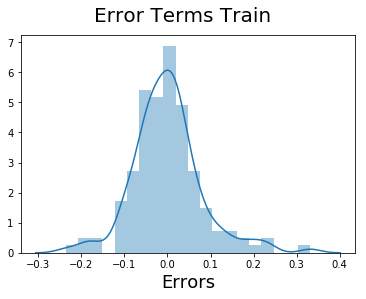

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms Train', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

We can  see that the error terms are normally distributed with mean at 0. so our assumptions hold good.

Text(0, 0.5, 'y_pred')

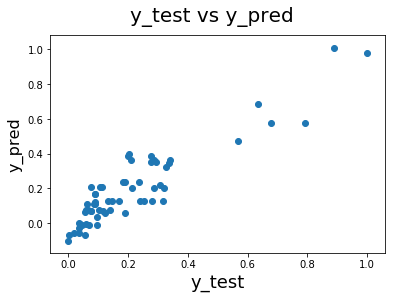

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)


We can certaily see a pattern in the distribution of predicited and test data

In [93]:
y_original=y_test.reset_index(drop=True)
test=pd.DataFrame([y_original,y_test_pred])
test=test.transpose()
test.head()

,price,Unnamed 0
0,0.058474,-0.006793
1,0.077398,0.069932
2,0.086148,0.111997
3,0.097473,-0.010539
4,0.055099,0.065255


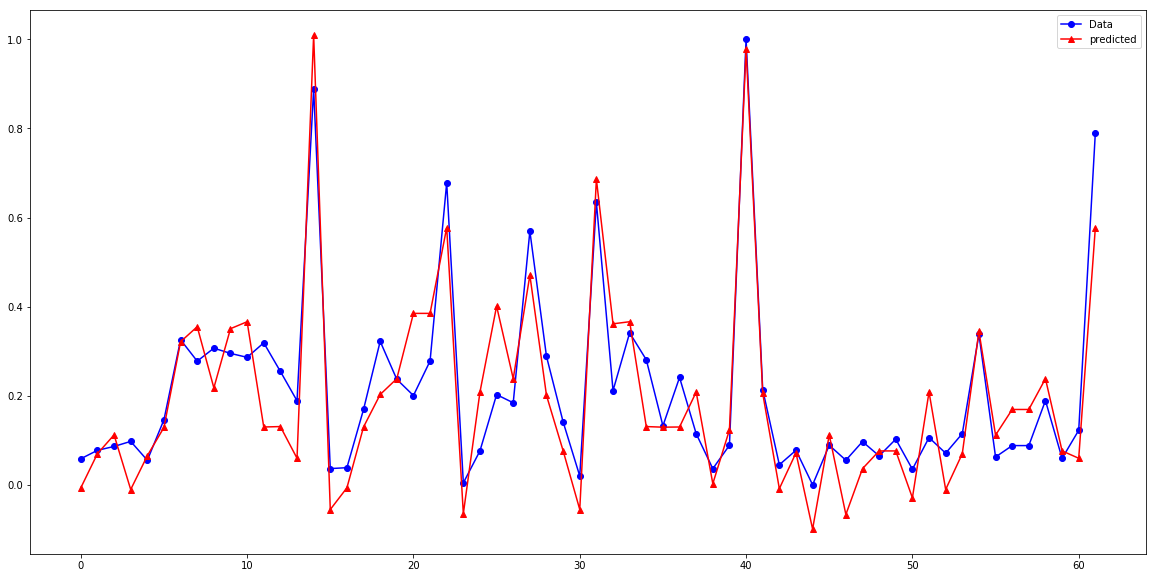

In [94]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(test['price'], 'b-o', label="Data") # the test original data
ax.plot(test['Unnamed 0'], 'r-^', label="predicted") #the perdicted data
ax.legend(loc="best");

We can see that the predicted and orignal prices are very near to each other. 

# Conclusion

We have the following conclusion from the models and the plots:

The following are the factors that drive the market price of US cars:
- carheight            
- enginesize           
- enginetype_rotor     
- fuelsystem_idi       
- non_luxury

The prepared model is good enough with RMSE and R square values as
- RMSE TEST: 0.08911508483587784
- RMSE TRAIN: 0.08138226244635197
- RMSE difference(Train-Test): -0.00773282238952587
- R2-Score TEST: 0.8185463853690147
- R2-Score TRAIN: 0.856622862765285
- R2- Score Difference(Train-Test): 0.03807647739627029

The residual analysis shows that the error terms are normally distributed, thus our assumptions hold true.